In [64]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction import text

In [9]:
print('# File sizes')
for f in os.listdir('../KAGGLE_Practice/data/quora-question-pairs'):
    print(f.ljust(30) + str(round(os.path.getsize('../KAGGLE_Practice/data/quora-question-pairs/' + f) / 1000000, 2)) + 'MB')

# File sizes
sample_submission.csv         22.35MB
test.csv                      314.02MB
train.csv                     63.4MB


In [10]:
print(os.listdir())

['.git', '.ipynb_checkpoints', 'data', 'notebook.ipynb', 'Quora Question.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb']


In [12]:
df_train = pd.read_csv('../KAGGLE_Practice/data/quora-question-pairs/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


## Data Exploration

#### 1. There are duplicate questions to analyze
#### 2. Qid is an unique identity that each one represents a single question

In [13]:
print('There are {} pairs of questiosns for analysis'.format(len(df_train)))
print('There are {0}({1}%) duplicate questiosns'.format(sum(df_train.is_duplicate), round(sum(df_train.is_duplicate)/len(df_train)*100,2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

There are 404290 pairs of questiosns for analysis
There are 149263(36.92%) duplicate questiosns
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780


### Look at Test Data

In [15]:
df_test = pd.read_csv('../KAGGLE_Practice/data/quora-question-pairs/test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [16]:
print('There are {} pairs of questiosns for analysis'.format(len(df_test)))

There are 2345796 pairs of questiosns for analysis


In [17]:
df_train[df_train["is_duplicate"]==1].head(5)

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [18]:
df_train.is_duplicate.nunique()

2

In [19]:
df_train.question1.nunique()

290456

In [20]:
len(pd.concat(g for _, g in df_train.groupby("question1") if len(g) > 1))

167965

In [21]:
(g for _, g in df_train.groupby("question1") if len(g) > 1)

<generator object <genexpr> at 0x000001EAAB018938>

In [22]:
df_train.groupby("question1").first()

,id,qid1,qid2,question2,is_duplicate
question1,,,,,
Can I pay with a debit card on PayPal?,109958,180383,39057,Can you transfer PayPal funds onto a debit car...,0
Does New York state have a flagship university?,395671,528660,528661,How can the New York state be fixed?,0
Failures haunt me all the time.How do I cope up?,369340,499773,499774,What can help me cope up with my failure?,1
"How do I make the time lapse images using an EOS 70D, with an intervalometer?",152201,239174,53064,How do I make time-lapse photography?,0
"I didn't file a police report for a car accident that happened over a month ago. My insurance company won't pay for damage, what do I do?",271160,389194,389195,Why don't I get the money I paid for a year wo...,0
I have an offer from Manchester for mechatronics engineering and from Southampton for electromechanical. Which should I choose?,403915,537535,537536,Are the Universities of Manchester and Southam...,0
I'm openly gay and falling in love with my best friend I've known for 5 years he's a really great guy but I'm stuck. What should I do?,380723,512372,11858,I'm in love with my best friend. I'm gay; he's...,1
Politics of Tamil Nadu: How did 'Gopalasamy' become 'Vaiko'?,326562,452892,452893,Why isn't Vaiko successful in Tamil Nadu polit...,0
The Mortal Instruments (book series): Will Jace and clary get married?,103371,170876,170877,How can I get the Dragon Ball series?,0


In [23]:
df_train[df_train["id"]==103371]['question1']

103371     The Mortal Instruments (book series): Will Ja...
Name: question1, dtype: object

In [24]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [25]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

In [26]:
train_qs.head(5)

0    What is the step by step guide to invest in share market in india?          
1    What is the story of Kohinoor (Koh-i-Noor) Diamond?                         
2    How can I increase the speed of my internet connection while using a VPN?   
3    Why am I mentally very lonely? How can I solve it?                          
4    Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
dtype: object

In [27]:
dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Probability')

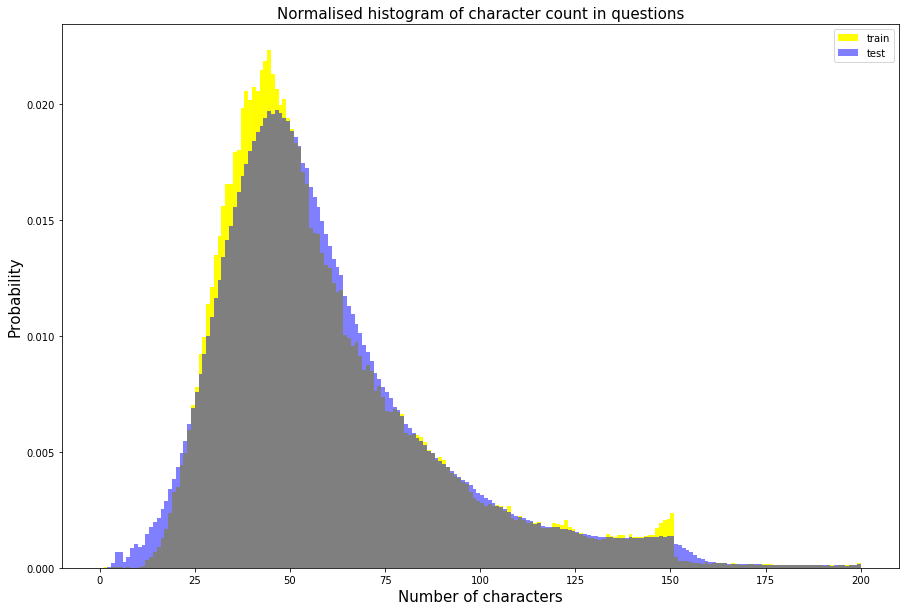

In [28]:
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color='yellow', normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color='blue', normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

(-0.5, 1439.5, 1079.5, -0.5)

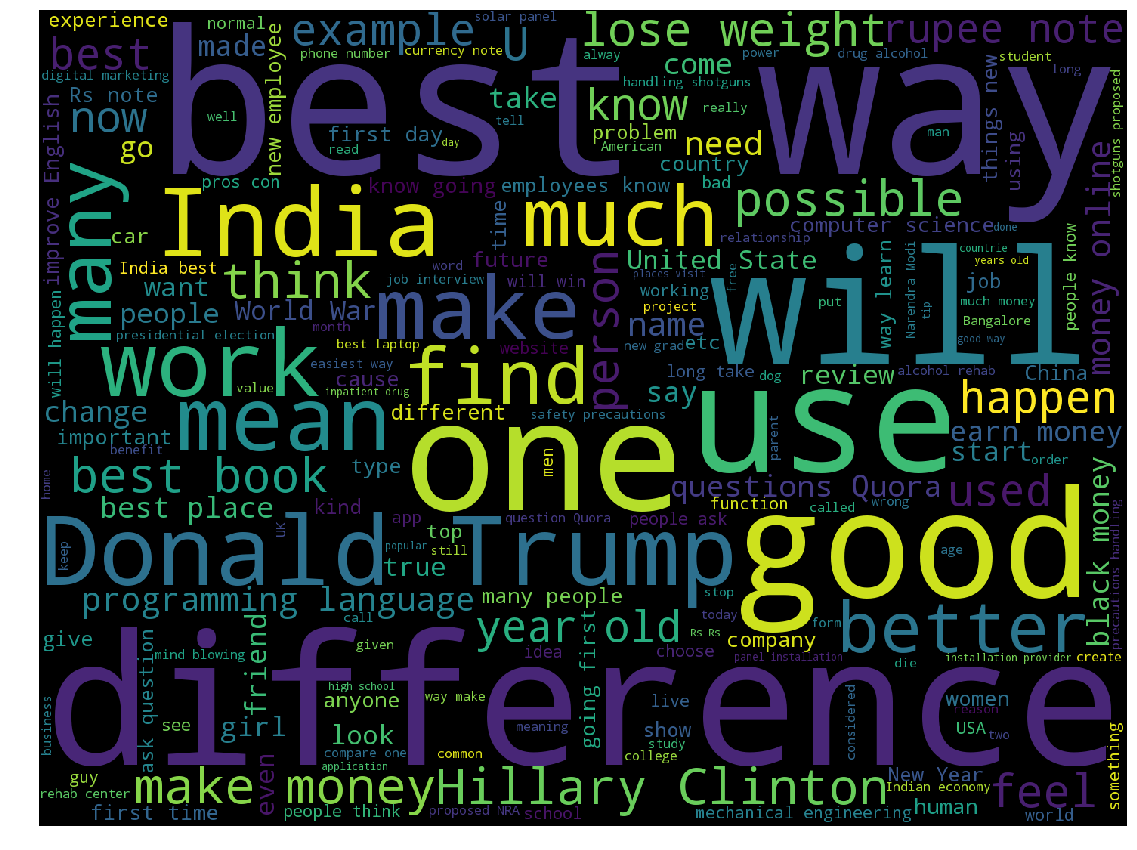

In [29]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

### Semantic Analysis

In [30]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


### Initial Feature Analysis

In [31]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

In [32]:
Question1Split = df_train['question1'].apply(lambda x: str(x).lower().split())
Question2Split = df_train['question2'].apply(lambda x: str(x).lower().split())

In [33]:
def applywords(x):
    qwords = {}
    for item in x:
        for word in item:
            if word not in stops:
                qwords[word] = 1
    return qwords

In [34]:
Container1 = applywords(Question1Split)

In [35]:
Container2 = applywords(Question2Split)

In [36]:
print(len(Container2),len(Container1))

136628 142398


D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'word_match_share')

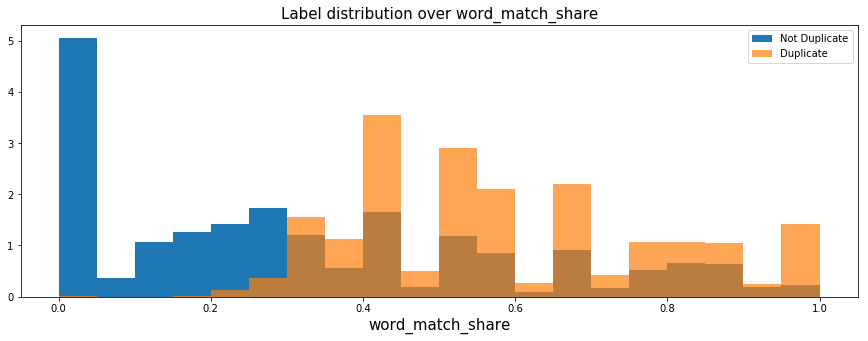

In [37]:
stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

### TF-IDF

It is to weigh the terms by how uncommon they are, meaning that we care more about rare words existing in both questions than common one.

### Tfidftransformer vs. Tfidfvectorizer

#### Tfidftransformer: compute word counts using CountVectorizer and then calculate IDF and Tf-idf scores
#### Tfidfvectorizer: do all three steps at once

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)

In [40]:
q1words = {}
q2words = {}
for word in str(df_train['question1']).lower().split():
    if word not in stops:
        q1words[word] = 1
for word in str(df_train['question2']).lower().split():
    if  word not in stops:
        q2words[word] = 1

In [41]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.shape)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)


In [42]:
str(df_train['question1'][1])

'What is the story of Kohinoor (Koh-i-Noor) Diamond?'

In [43]:
shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))

In [44]:
train_word_match.head(10)

0    0.727273
1    0.307692
2    0.363636
3    0.000000
4    0.000000
5    0.470588
6    0.000000
7    0.500000
8    0.500000
9    0.363636
dtype: float64

In [45]:
#train_word_match = df_train.apply(word_match_share, axis=1, raw=True)

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'word_match_share')

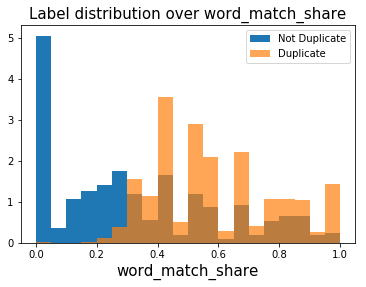

In [46]:
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [47]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [56]:
Counter(words[1:10])

Counter({'by': 1,
         'guide': 1,
         'in': 1,
         'invest': 1,
         'is': 1,
         'step': 2,
         'the': 1,
         'to': 1})

In [73]:
test =[' '.join(i for i in train_qs)]

In [60]:
test_qs = train_qs[0:5]

In [61]:
test_qs

0    What is the step by step guide to invest in share market in india?          
1    What is the story of Kohinoor (Koh-i-Noor) Diamond?                         
2    How can I increase the speed of my internet connection while using a VPN?   
3    Why am I mentally very lonely? How can I solve it?                          
4    Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
dtype: object

In [66]:
my_stop_words = text.ENGLISH_STOP_WORDS
vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=my_stop_words)

In [76]:
X = vectorizer.fit_transform(test)

In [77]:
idf_values = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
# printing the tfidf vectors

In [80]:
#print(X)
# printing the vocabulary
print(vectorizer.vocabulary_)

{'what': 83239, 'is': 40579, 'the': 76375, 'step': 72819, 'by': 14275, 'guide': 34358, 'to': 77206, 'invest': 40268, 'in': 38686, 'share': 69174, 'market': 47836, 'india': 38957, 'story': 73088, 'of': 54666, 'kohinoor': 43546, 'koh': 43543, 'noor': 53716, 'diamond': 23426, 'how': 37047, 'can': 14738, 'increase': 38855, 'speed': 71880, 'my': 51818, 'internet': 39988, 'connection': 19053, 'while': 83337, 'using': 80615, 'vpn': 82212, 'why': 83469, 'am': 6504, 'mentally': 48980, 'very': 81459, 'lonely': 46052, 'solve': 71370, 'it': 40793, 'which': 83326, 'one': 55013, 'dissolve': 24299, 'water': 82728, 'quikly': 62519, 'sugar': 73832, 'salt': 67040, 'methane': 49243, 'and': 6961, 'carbon': 15015, 'di': 23366, 'oxide': 56166, 'astrology': 8802, 'capricorn': 14953, 'sun': 73987, 'cap': 14881, 'moon': 50819, 'rising': 65731, 'does': 24632, 'that': 76361, 'say': 67602, 'about': 4409, 'me': 48542, 'should': 69665, 'buy': 14232, 'tiago': 76855, 'be': 10796, 'good': 33490, 'geologist': 32666, 'w

In [67]:
X = vectorizer.fit_transform(["this is an apple.","this is a book."])

In [84]:
X

<1x86153 sparse matrix of type '<class 'numpy.float64'>'
	with 86153 stored elements in Compressed Sparse Row format>

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
#vectors = vectorizer.fit_transform([train_qs])

In [83]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 


[('シ', 9.998000399920016e-05),
 ('し?', 9.998000399920016e-05),
 ('19-year-old.', 9.998000399920016e-05),
 ('1-855-425-3768', 9.998000399920016e-05),
 ('confederates', 9.998000399920016e-05),
 ('asahi', 9.998000399920016e-05),
 ('fab', 9.998000399920016e-05),
 ('109?', 9.998000399920016e-05),
 ('samrudi', 9.998000399920016e-05),
 ('fulfill?', 9.998000399920016e-05)]